In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
print(df)


      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
print("number of rows ={}".format(df.shape[0]))
print("number of columns ={}".format(df.shape[1]))


number of rows =10000
number of columns =11


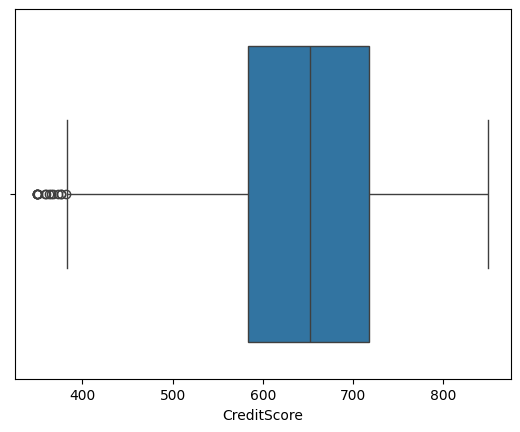

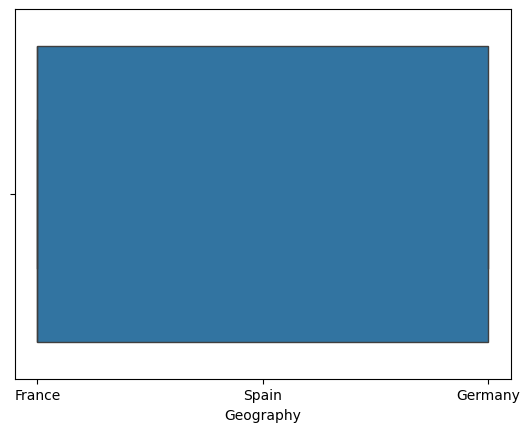

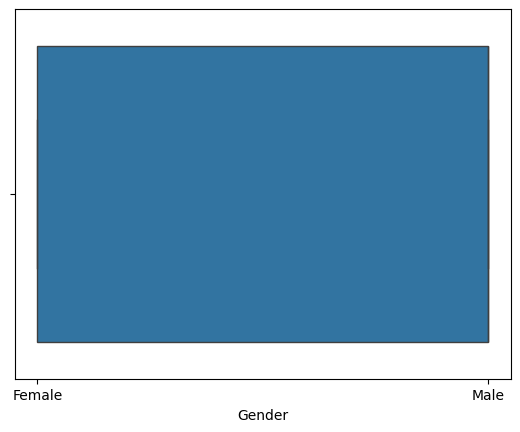

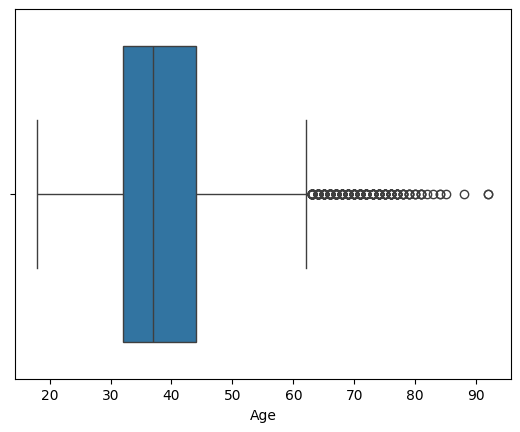

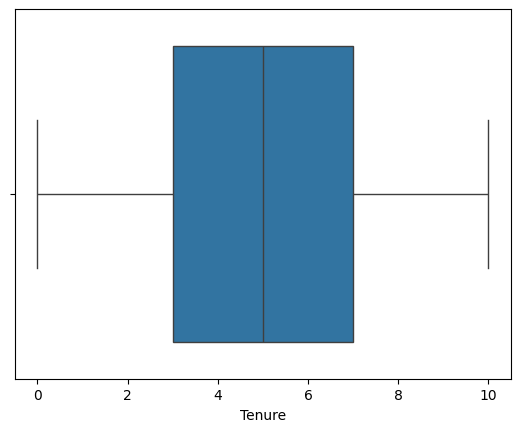

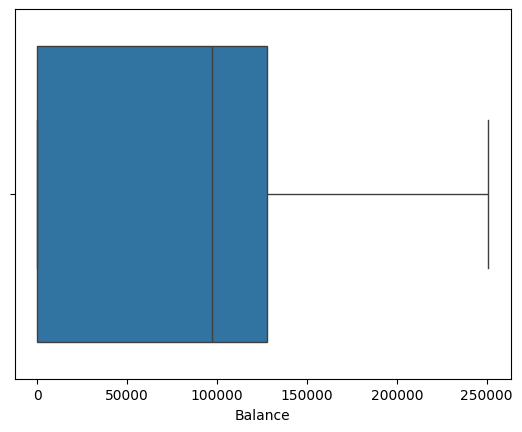

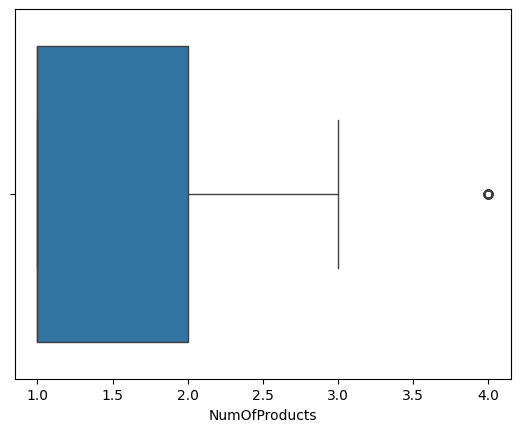

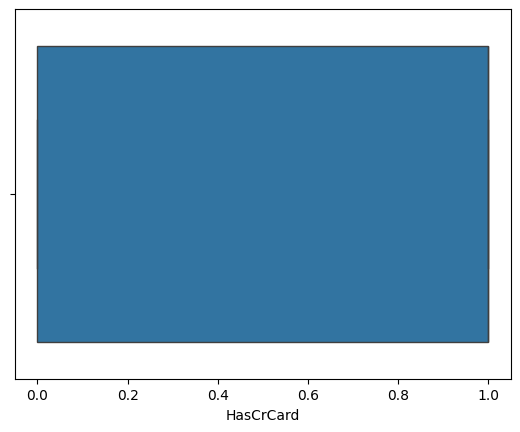

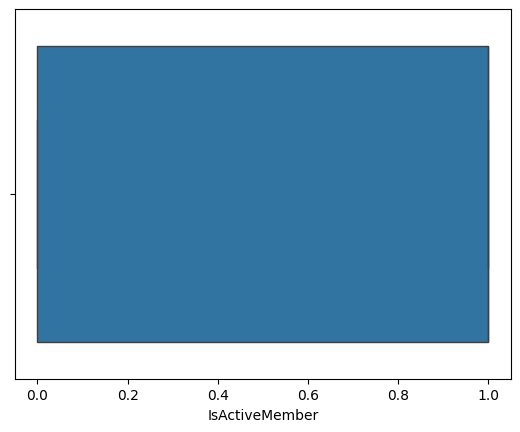

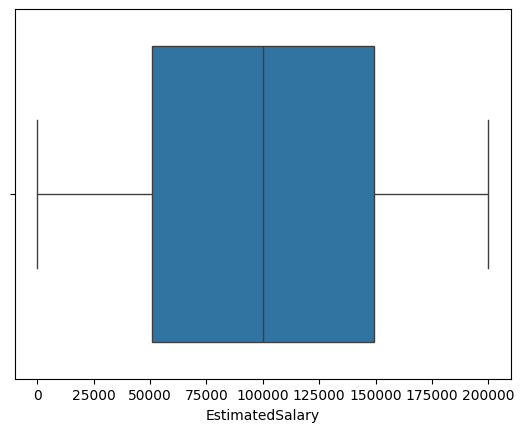

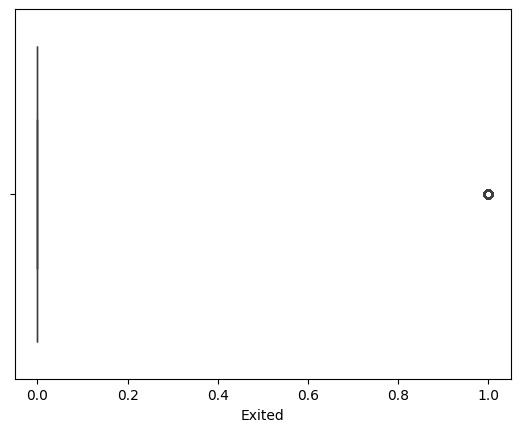

In [ ]:
def func(col):
  sns.boxplot(x=col,data=df)
  plt.show()
for i in df.columns:
  func(i)

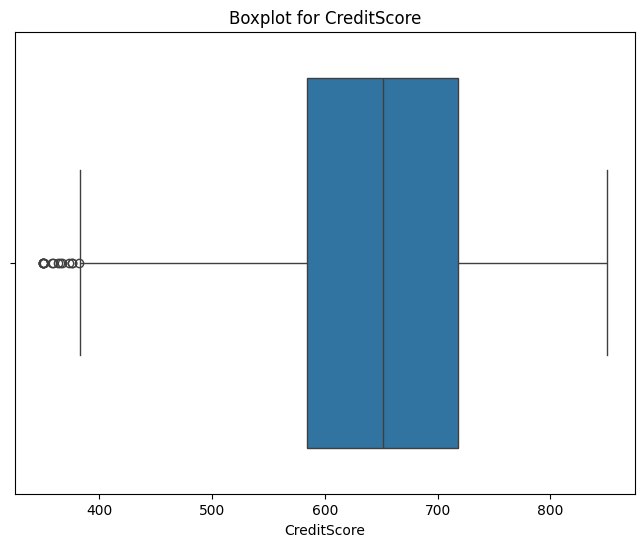

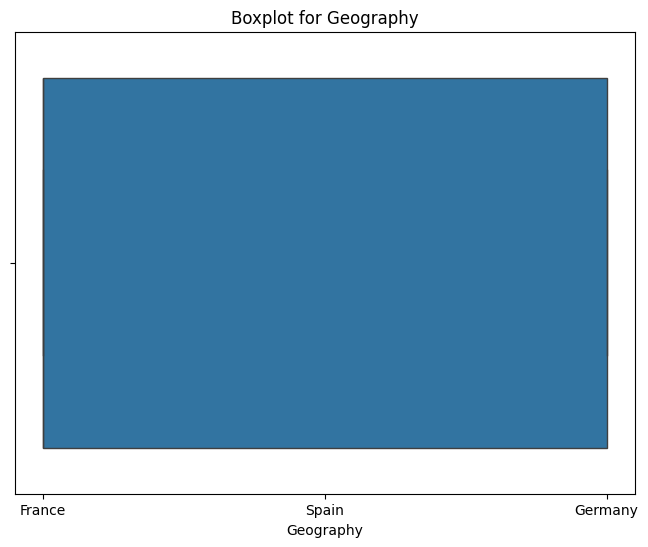

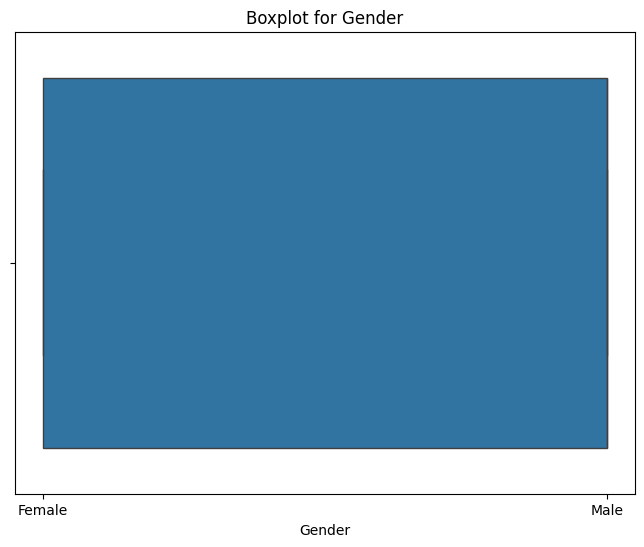

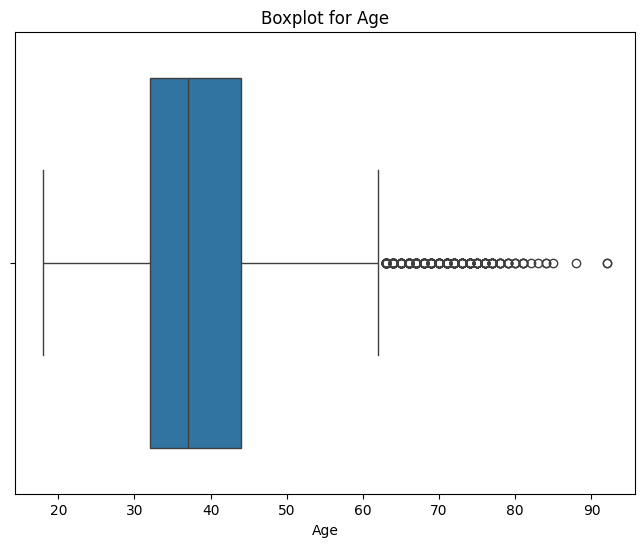

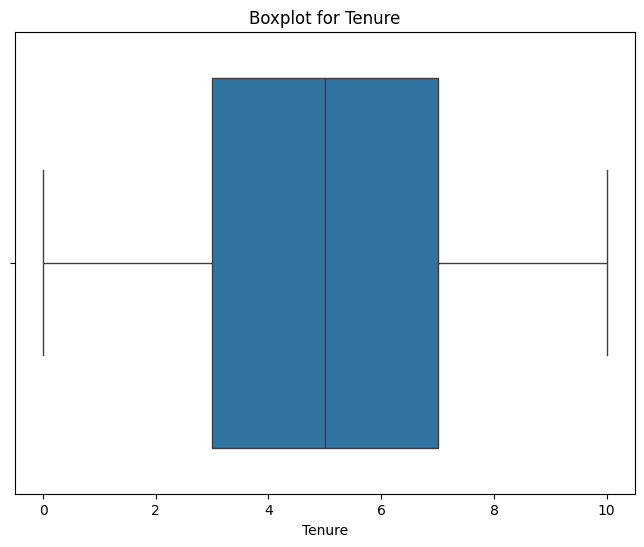

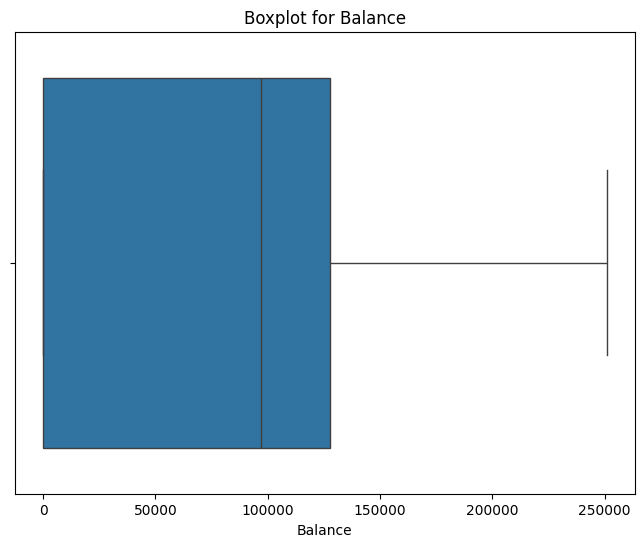

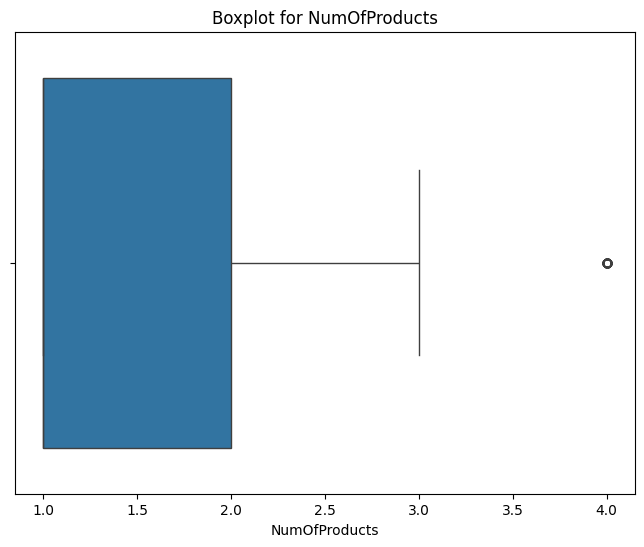

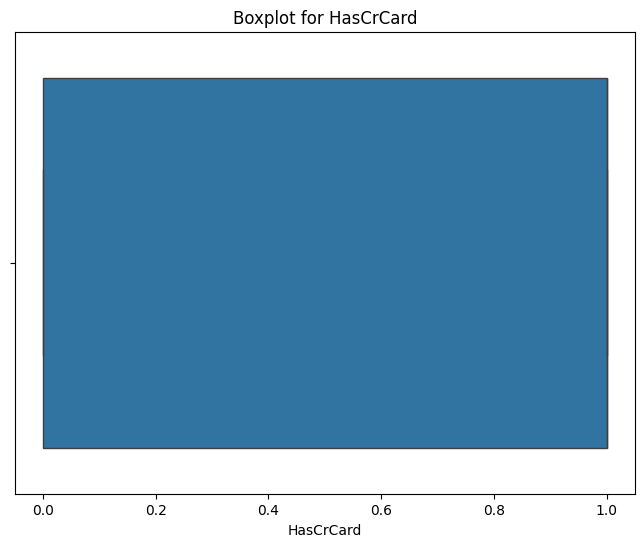

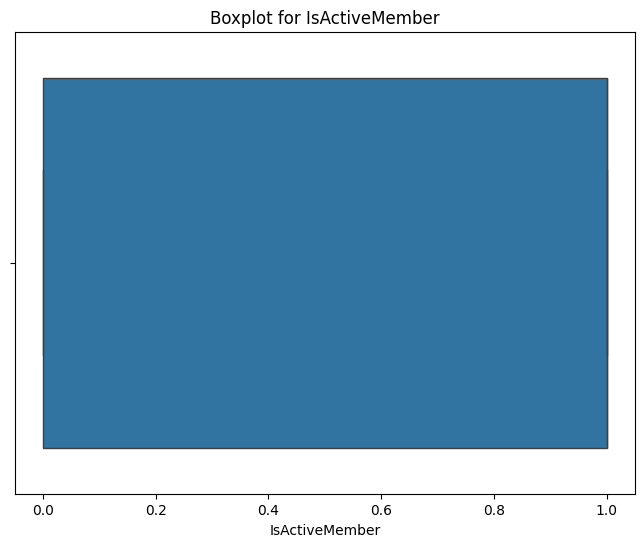

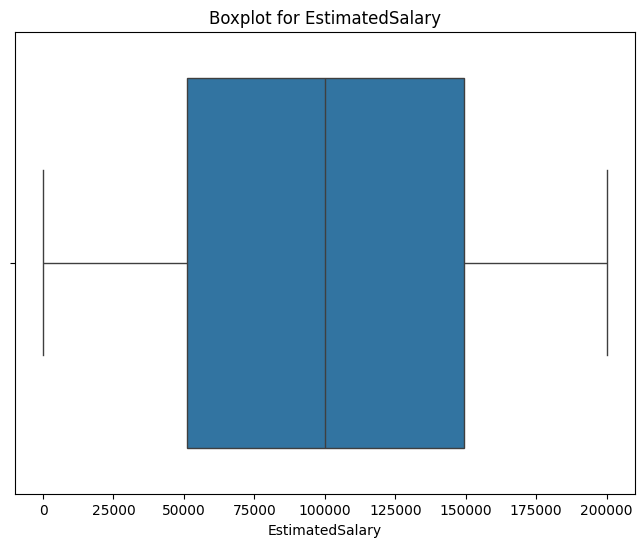

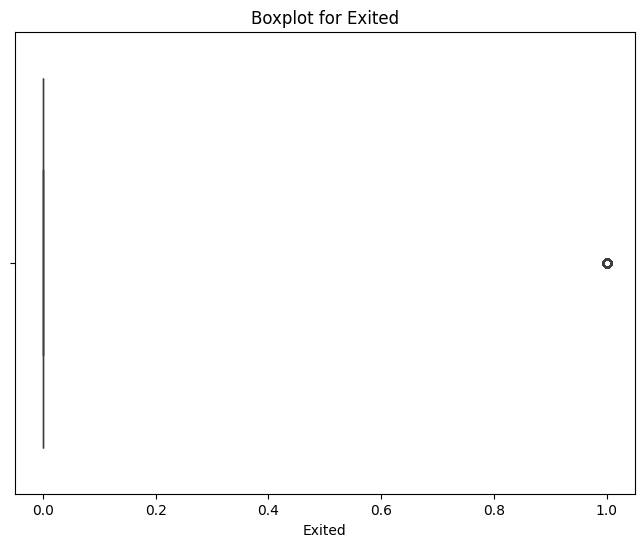

In [ ]:
for column in df.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate quantiles
        quant = df[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with values within the bounds
# Iterate over each column and plot boxplot
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
quant=df['CreditScore'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
upper_bound=Q3+1.5*IQR
print(upper_bound)
lower_bound=Q1-1.5*IQR
print(lower_bound)


0.75    718.0
0.25    584.0
Name: CreditScore, dtype: float64
718.0
584.0
134.0
919.0
383.0


In [ ]:
# Calculate the boolean masks for outliers
outliers_upper = df['CreditScore'] > upper_bound
outliers_lower = df['CreditScore'] < lower_bound

# Drop the rows with outliers
df = df[~(outliers_upper | outliers_lower)]  # Keep rows that are NOT outliers

print("number of rows after removing outliers ={}".format(df.shape[0]))

number of rows after removing outliers =9985


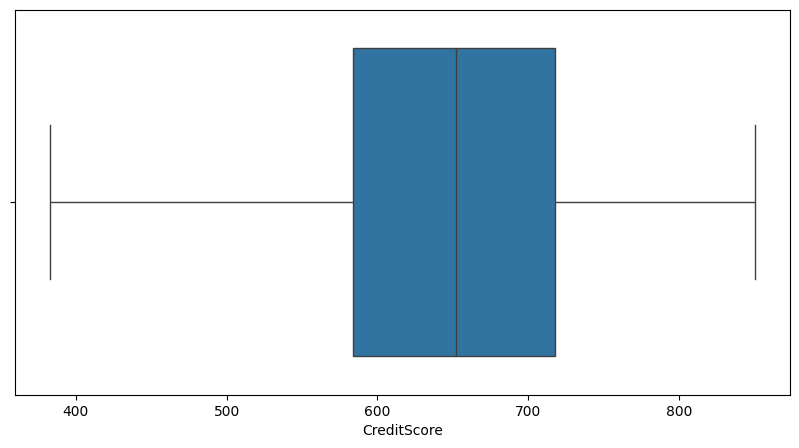

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['CreditScore'])
plt.show()

In [ ]:
quant=df['Age'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)

0.75    44.0
0.25    32.0
Name: Age, dtype: float64
44.0
32.0
12.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Calculate the boolean masks for outliers
lower_bound_mask = df['Age'] < lower_bound  # Use the calculated lower value
upper_bound_mask = df['Age'] > upper_bound  # Use the calculated upper value

# Drop the rows with outliers
df.drop(df[lower_bound_mask | upper_bound_mask].index, inplace=True)

print("number of rows after removing outliers ={}".format(df.shape[0]))

number of rows after removing outliers =9626


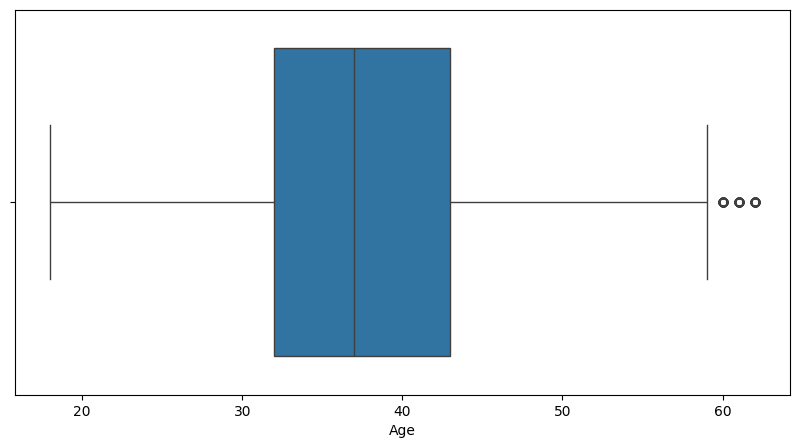

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Exited'])
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)



In [ ]:
X_train.shape

(7219, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training and test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [ ]:
X_train_scaled

array([[ 2.06889223,  0.25091541,  1.02701922, ...,  1.        ,
         1.        ,  0.        ],
       [-0.27799536,  0.02442484,  0.68158514, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.23813556, -0.54180158,  0.33615105, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.32991765,  0.02442484, -0.7001512 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.75006602,  0.25091541,  0.68158514, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32682565, -0.4285563 ,  0.68158514, ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
import tensorflow as tf
from tensorflow import keras

# ... (rest of your code)

model = keras.Sequential([
    keras.layers.Dense(6, activation='relu', input_dim=15),  # Update input dimension
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use the preprocessed data here
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
226/226 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7982
Epoch 2/100
226/226 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.7969
Epoch 3/100
226/226 [==============================] - 1s 2ms/step - loss: 0.4164 - accuracy: 0.8134
Epoch 4/100
226/226 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8221
Epoch 5/100
226/226 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8267
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8309
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8377
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8413
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8453
Epoch 10/100
226/226 [==============================] - 0s 2ms/step - loss: 0.3611 - accura

In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.25)  # Use preprocessed data

Epoch 1/100
542/542 [==============================] - 3s 4ms/step - loss: 0.3279 - accuracy: 0.8622 - val_loss: 0.3528 - val_accuracy: 0.8515
Epoch 2/100
542/542 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8635 - val_loss: 0.3466 - val_accuracy: 0.8521
Epoch 3/100
542/542 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8644 - val_loss: 0.3470 - val_accuracy: 0.8499
Epoch 4/100
542/542 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8635 - val_loss: 0.3468 - val_accuracy: 0.8499
Epoch 5/100
542/542 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8626 - val_loss: 0.3463 - val_accuracy: 0.8521
Epoch 6/100
542/542 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8635 - val_loss: 0.3478 - val_accuracy: 0.8504
Epoch 7/100
542/542 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8655 - val_loss: 0.3518 - val_accuracy: 0.8510

In [49]:
model.evaluate(X_test_scaled,y_test)

76/76 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8608


[0.35205432772636414, 0.8608226180076599]

In [50]:
# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

76/76 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [51]:
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print('accuracy on test data = {}'.format(test_acc))

accuracy on test data = 0.8608226007478189


In [53]:
train_pre=model.predict(X_train_scaled)
train_pre = (train_pre>0.5)
train_acc=accuracy_score(y_train,train_pre)
print('accuracy on test data = {}'.format(train_acc))

226/226 [==============================] - 0s 1ms/step
accuracy on test data = 0.8636930322759385


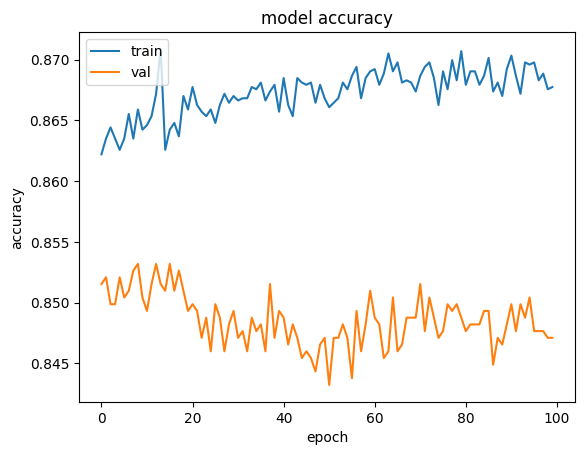

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()